---
title: USED CARS IN EGYPT
subtitle: "Predict price of used cars in Egypt"
author: "Mahmoud Zaher"
date: 09/21/2023
date-format: "MMM D, YYYY"
format:
  html:
      css: Styles/styles.css
      code-fold: false
      code-copy: true
      code-block-bg: "#dbdbdb"
      code-block-border-left: "#31BAE9"
      code-overflow: scroll
      code-tools:        
        source: https://github.com/zaher-m/ThinkAI
        toggle: True
        caption: 'CODE'

jupyter: python3
title-block-banner: true
engine: knitr
editor:
  render-on-save: true
---



```{=html}

<head>
    <link rel="stylesheet" href="Styles/toc.css">
</head>
<div id="custom-toc" class="custom-toc">
    <p>Table of Contents</p>  
    <div class="all-sections">  
        <ol class="all-lists">
            <li><a href="#EDA">Exploratory Data Analysis (EDA)</a>
                <ol>
                    <li><a href="#sec_1_1">Get basic statistics from numerical features</a></li>
                    <li><a href="#sec_1_2">Analyze the distribution of all features</a></li>
                    <li><a href="#sec_1_3">Joint distributions/relations</a></li>
                </ol>
            </li>
            <li><a href="#DP">Data Preprocessing & Model Selection</a>
                <ol>
                    <li><a href="#sec_2_1">Split the data into training and testing</a></li>
                    <li><a href="#sec_2_2">Creating our pipeline</a></li>
                </ol>
            </li>
            <li><a href="#MS">Training and Evaluation</a>
                <ol>
                    <li><a href="#sec_3_1">Bias-Variance and Overfit-Underfit investigation</a></li>
                    <li><a href="#sec_3_2">Other potential models to consider</a></li>
                </ol>
            </li>
            <li><a href="#HT">Hyperparameter Tuning</a>
                <ol>
                    <li><a href="#sec_4_1">Hyperparameter Tuning using GridSearchCV</a></li>
                    <li><a href="#sec_4_2">Hyperparameter Tuning using RandomizedSearchCV</a></li>
                </ol>
            </li>
            <li><a href="#MI">Model Interpretation</a>
                
            </li>


        </ol>
    </div>
</div>
```

<!-- ### Table of Contents
<hr>

1. [Exploratory Data Analysis (EDA)](#EDA)
    * [Explore the distribution of the target variable 'Price'](#section_1_1)
    * [Analyze the distribution of other numerical and categorical features](#section_1_2)

2. [Data Preprocessing & Model Selection](#DP)
    - [Split the data into training and testing sets for model evaluation](#section_3_2) 
    - [Handle categorical variables (e.g., one-hot encoding, ordinal encoder, ..)](#section_3_1)
    
3. [Training and Evaluation](#MS)
    * [Overfit, Generalization, and Underfit](#section_4_1)
    * [Effect of the sample size in cross-validation](#section_4_2)
    * [Other potential models](#section_4_3)
    * [Evaluate model performance using appropriate metrics such as Mean Absolute Error (MAE), Mean Squared Error (MSE), and R2](#section_4_4)
    
    
4. [Hyperparameter Tuning](#HT) 
    * [Hyperparameter Tuning using GridSearchCV](#section_5_1)
5. [Model Interpretation](#MI) 
    * [interpret the models to understand which features have the most significant impact on the car's price](#section_6_1) -->

<br>
<h3> Import libraries/pacakes </h3>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('../Data/Used Cars in Egypt.csv')
df.head()

,Unnamed: 0,Brand,Model,Body,Color,Year,Fuel,Kilometers,Engine,Transmission,Price,Gov
0,5337,Hyundai,Accent,Sedan,Black,2007,Benzine,140000 to 159999,1600 CC,Automatic,140.0,Giza
1,5338,Hyundai,Accent,Sedan,Silver,2005,Benzine,180000 to 199999,1000 - 1300 CC,Manual,78.0,Qena
2,5339,Hyundai,Accent,Sedan,Gray,1999,Benzine,140000 to 159999,1400 - 1500 CC,Manual,70.0,Giza
3,5340,Hyundai,Accent,Sedan,Blue- Navy Blue,2009,Benzine,140000 to 159999,1600 CC,Automatic,150.0,Cairo
4,5341,Hyundai,Accent,Sedan,Silver,2000,Benzine,10000 to 19999,1000 - 1300 CC,Manual,75.0,Giza


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14741 entries, 0 to 14740
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    14741 non-null  int64  
 1   Brand         14741 non-null  object 
 2   Model         14741 non-null  object 
 3   Body          14741 non-null  object 
 4   Color         14741 non-null  object 
 5   Year          14741 non-null  int64  
 6   Fuel          14741 non-null  object 
 7   Kilometers    14741 non-null  object 
 8   Engine        14741 non-null  object 
 9   Transmission  14741 non-null  object 
 10  Price         14741 non-null  float64
 11  Gov           14741 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 1.3+ MB


In [4]:
print(f"Duplicated values: {df.duplicated().sum()}")

Duplicated values: 0


<h3 align='center'>1.Exploratory Data Analysis (EDA)</h3> <a class="anchor" id="EDA"></a>


In [4]:
df.drop(columns=['Unnamed: 0'], axis=1, inplace = True)

In [6]:
from sklearn.compose import make_column_selector as selector


def stat_summary(df):
    '''Prints basic statistics for both numerical and categorical features. 
    Parameters:
        df  : the input dataframe.
    '''
    categorical_columns =  selector(dtype_include=object)(df)
    numerical_columns = selector(dtype_exclude=object)(df)
    numerical_summary = df[numerical_columns].describe()[1:]
    categorical_summary = df[categorical_columns].describe()[1:]


    print("\nSummary Statistics for Numerical Features:")
    print('-'*45)
    print(numerical_summary)

    print("\nSummary Statistics for Categorical Features:")
    print('-'*45)
    print(categorical_summary)


stat_summary(df)



Summary Statistics for Numerical Features:
---------------------------------------------
             Year       Price
mean  2005.456821  116.584987
std     12.655566   82.192718
min   1970.000000    3.000000
25%   1998.000000   43.700000
50%   2010.000000  110.000000
75%   2015.000000  161.000000
max   2022.000000  471.500000

Summary Statistics for Categorical Features:
---------------------------------------------
          Brand Model   Body  Color     Fuel        Kilometers   Engine  \
unique        3    18      3     14        2                16        3   
top     Hyundai   128  Sedan  White  Benzine  More than 200000  1600 CC   
freq       5692  2425  13453   2614    14200              2505     6762   

       Transmission    Gov  
unique            2     26  
top          Manual  Cairo  
freq           9862   4458  


<h4> Get basic statistics from numerical features. </h4> <a class="anchor" id="sec_1_1"></a>

Stats for 'Year' column:
Mean: 2005.4568211111864
Standard deviation: 12.65513666459369
Minimum: 1970
Maximum: 2022
Median: 2010.0



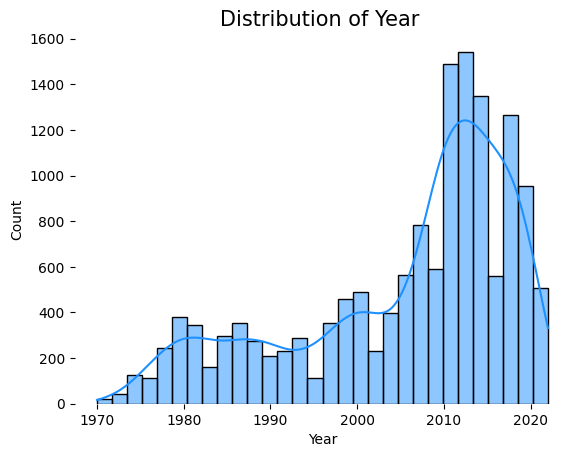

Stats for 'Price' column:
Mean: 116.58498744996947
Standard deviation: 82.18992985817523
Minimum: 3.0
Maximum: 471.5
Median: 110.0



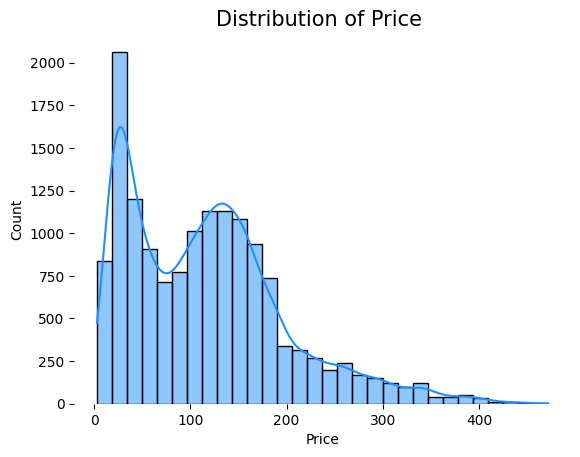

In [7]:
from sklearn.compose import make_column_selector as selector

def get_statistics(df, bins=30):
    '''Prints basic statistics, and plot histplot for numerical attributes from the input data. 
    Parameters:
        df  : the input dataframe;
        bins: the number of bins to the histogram.
    '''
    numerical_cols = selector(dtype_exclude=object)(df) #
    for col in numerical_cols:
        print(f"Stats for '{col}' column:")

        total = df[col].values
        print(f'Mean: {np.mean(total)}')
        print(f'Standard deviation: {np.std(total)}')
        print(f'Minimum: {np.min(total)}')
        print(f'Maximum: {np.max(total)}')
        print(f'Median: {np.median(total)}')
        print()
        plt.title(f"Distribution of {col} ",fontsize = 15)
        sns.histplot(data = df, x = df[col], color = 'dodgerblue', kde = True, bins=bins)
        plt.box(False);
        plt.show();

get_statistics(df)

<h4> Analyze the distribution of all features.</h4> <a class="anchor" id="sec_1_2"></a>

In [8]:

def show_dist(df, features):
    '''Shows distribution for both numerical and categorical attributes from the input data. 
    Parameters:
        df       : the input dataframe;
        features : columns in given dataframe.
    '''
    for feature in features:
        if df[feature].nunique() > 5:
            plt.figure(figsize=(15,5))
            sns.histplot(data = features, x = df[feature], color = 'dodgerblue', kde = True)
            plt.title(f"Distribution of {feature} ",fontsize = 25)
            sns.despine()
            plt.xticks(rotation=45)
            plt.show()
        else:
            plt.figure(figsize=(15,5))
            sns.histplot(data = features, x = df[feature], color = 'rebeccapurple', kde = False)
            plt.title(f"Distribution of {feature} ",fontsize = 25)
            sns.despine()
            plt.xticks(rotation=45)
            plt.show()

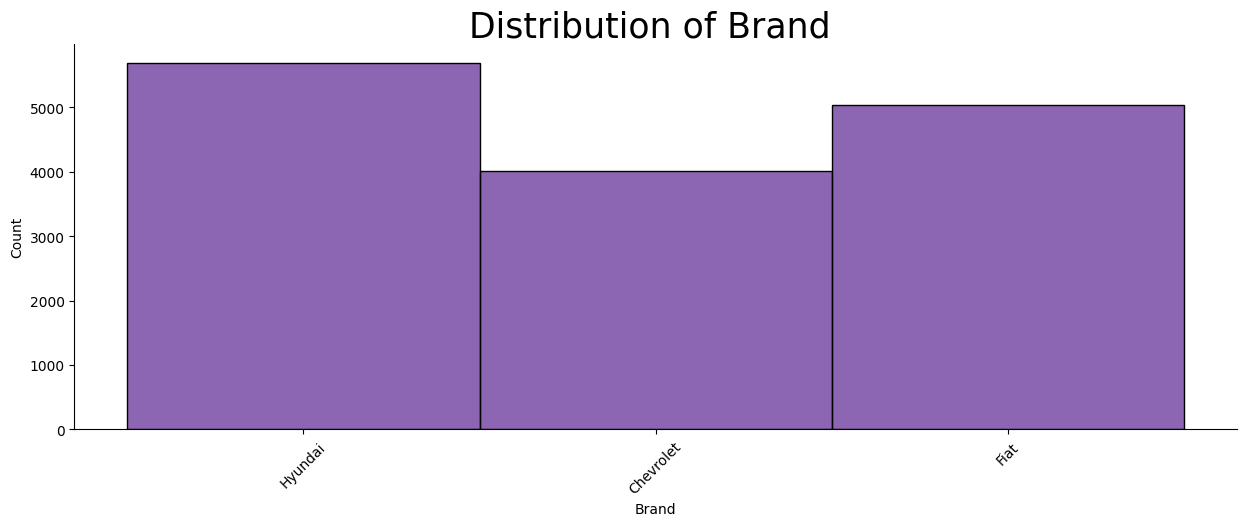

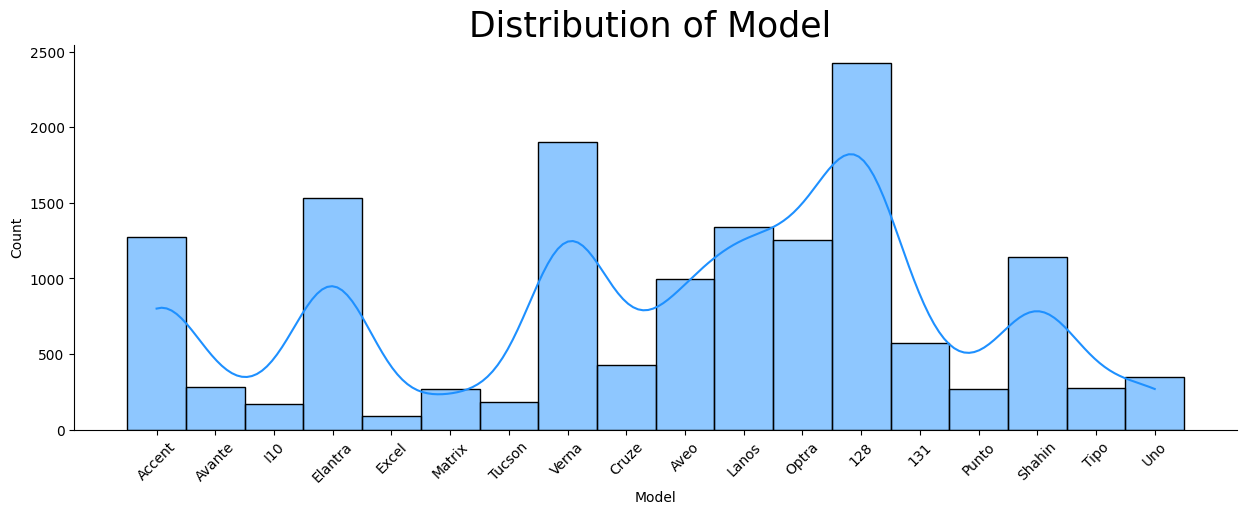

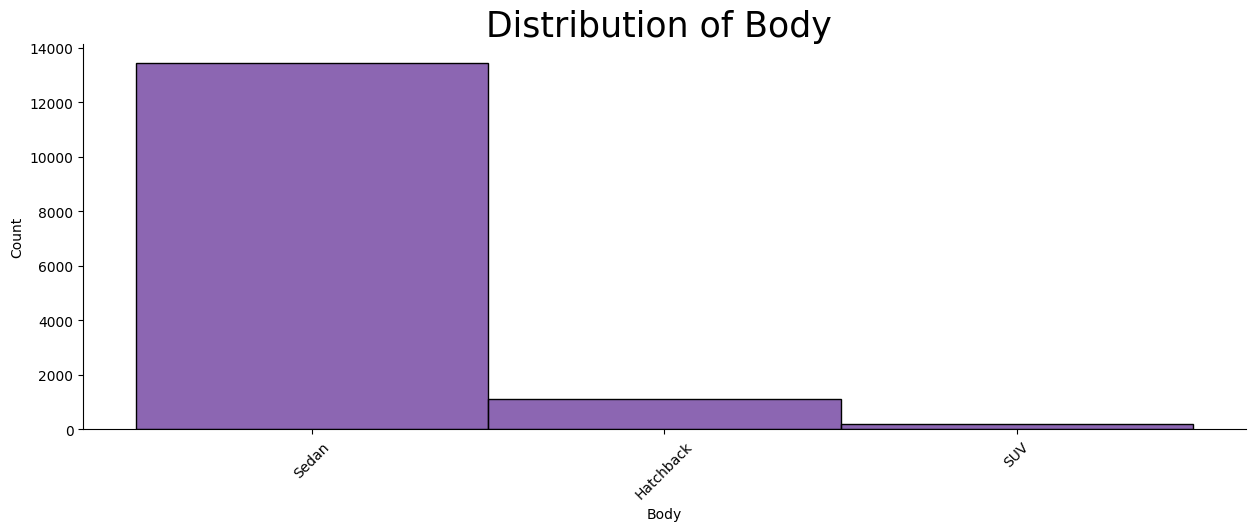

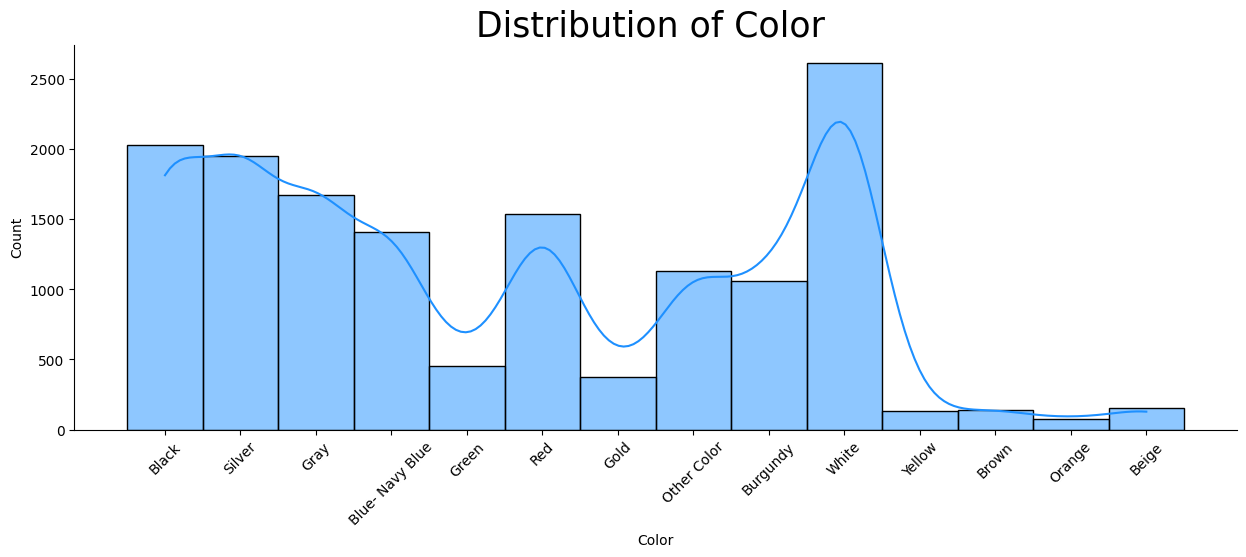

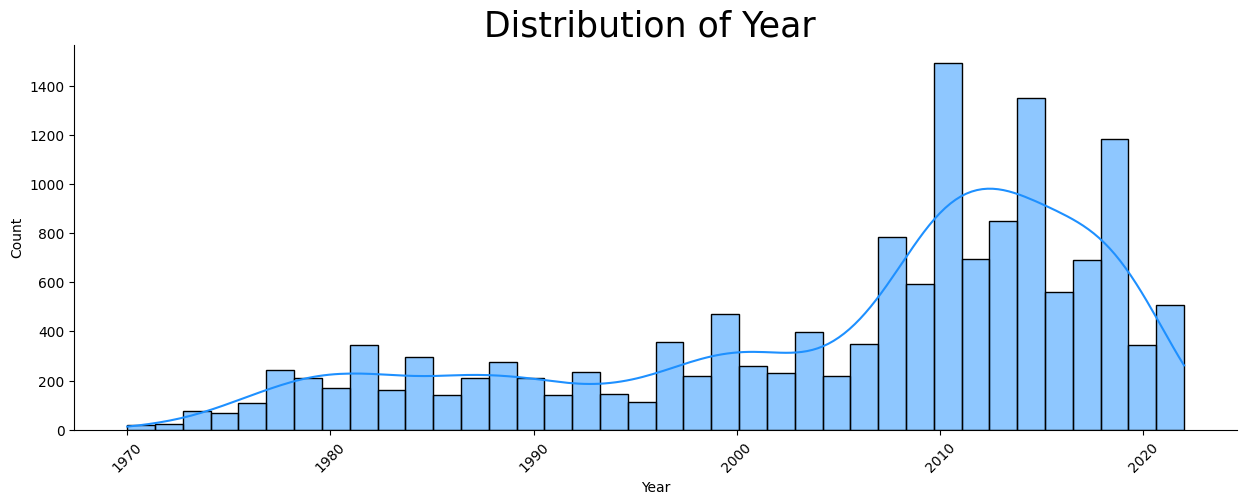

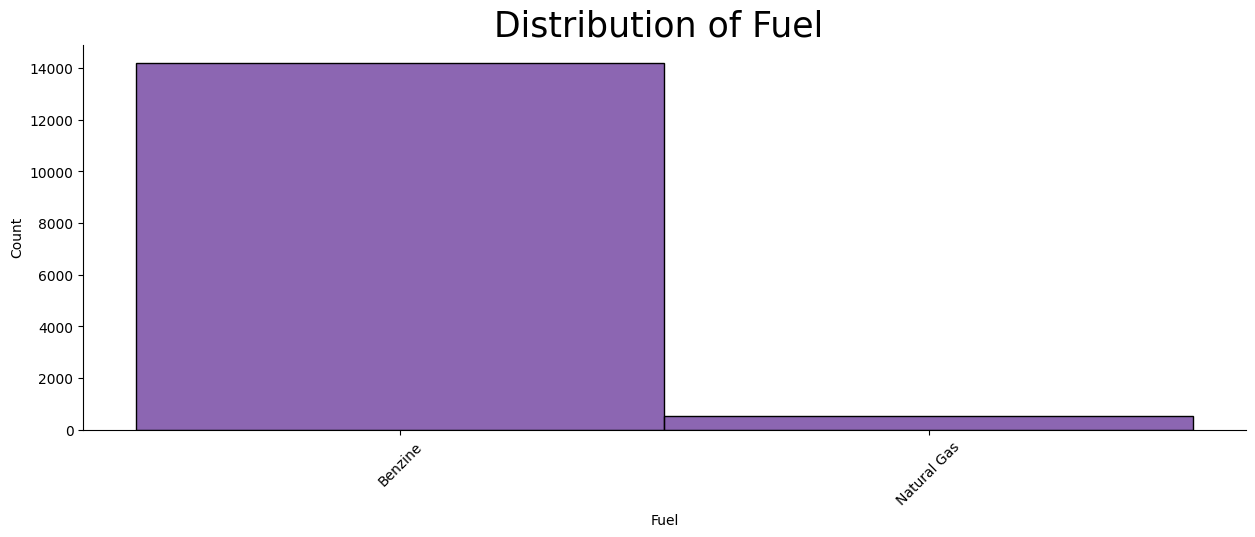

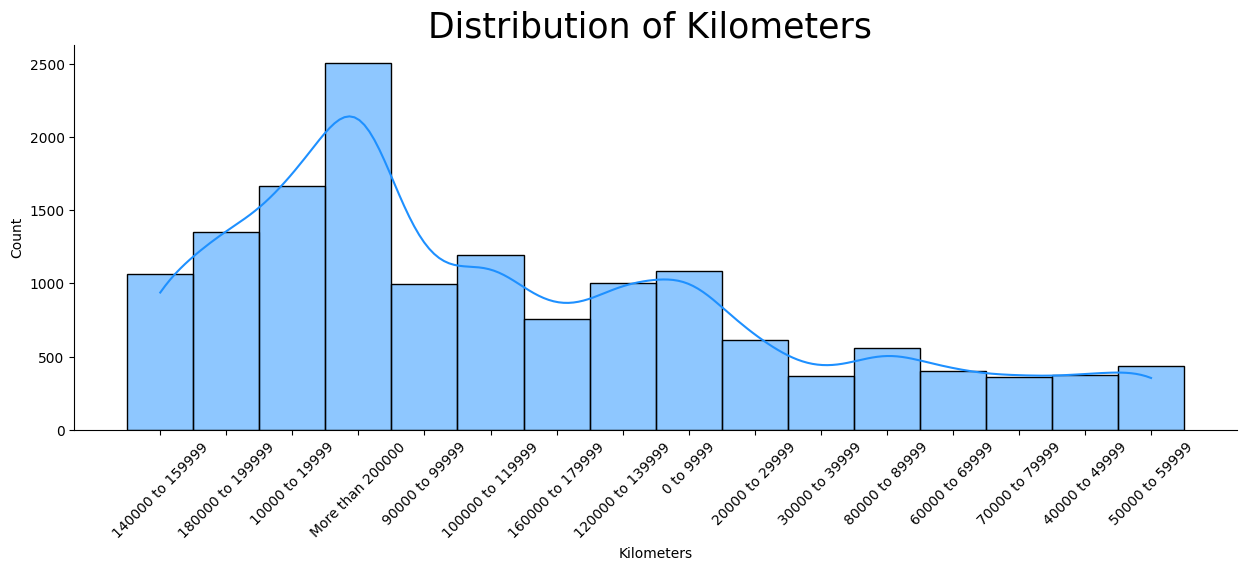

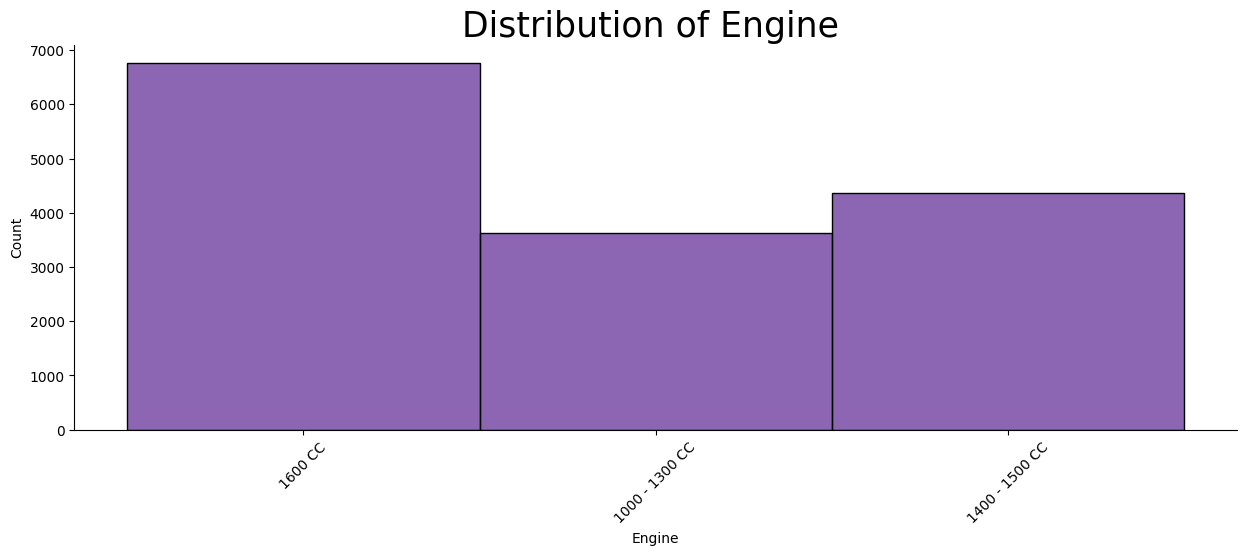

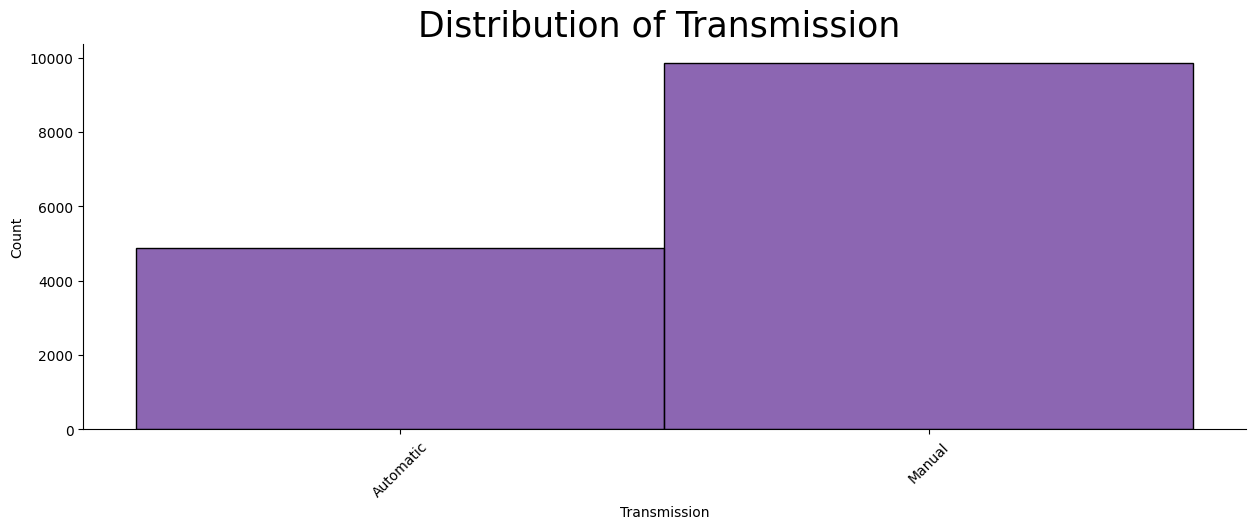

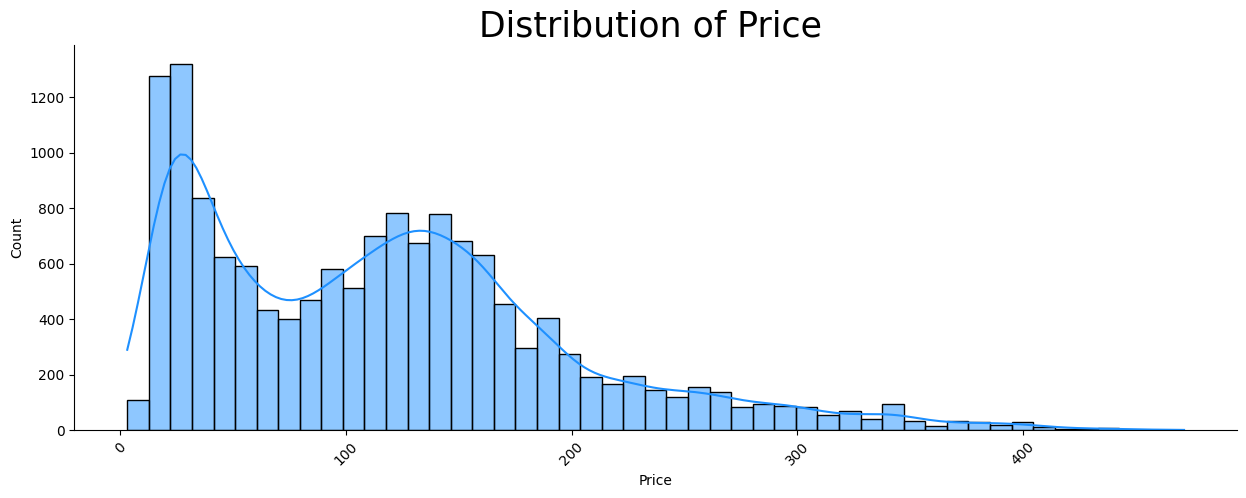

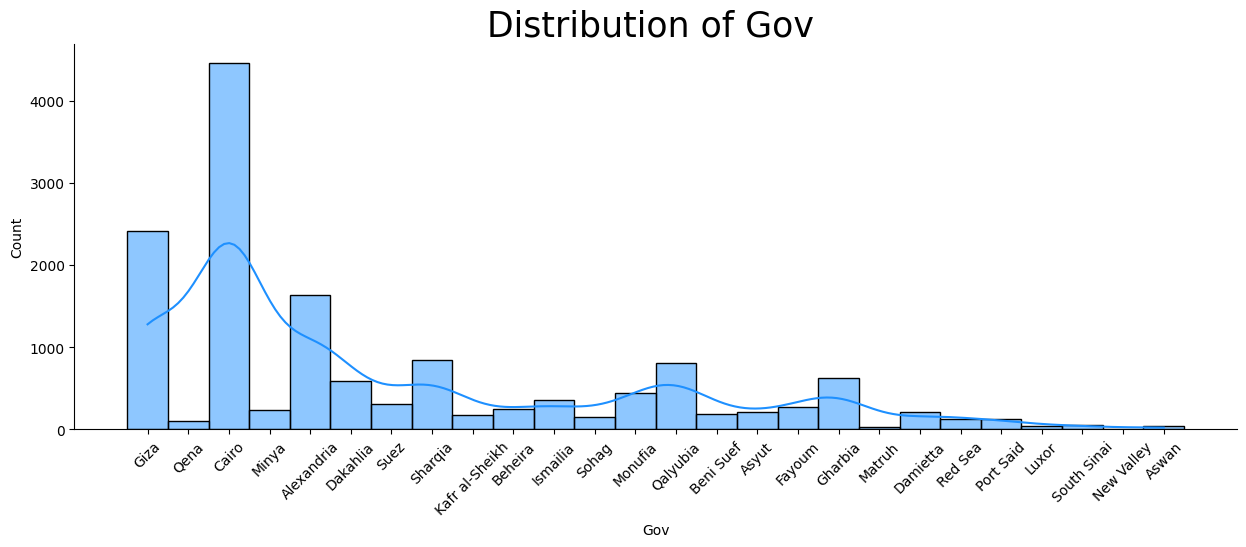

In [9]:
show_dist(df, df.columns)

<h4> Joint relations/distributions. </h4> <a class="anchor" id="sec_1_3"></a>

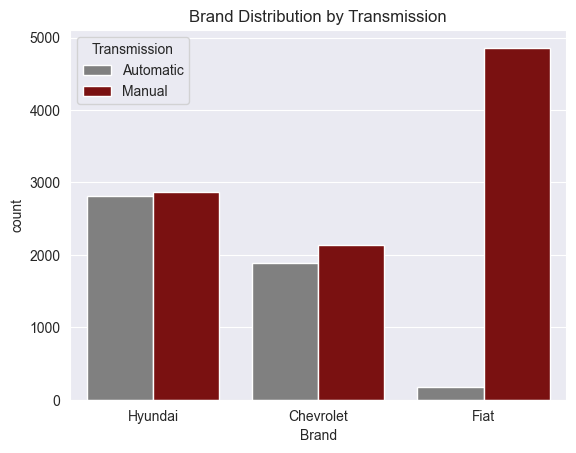

In [61]:
sns.countplot(data = df, x = 'Brand',hue = 'Transmission')
plt.title('Brand Distribution by Transmission');

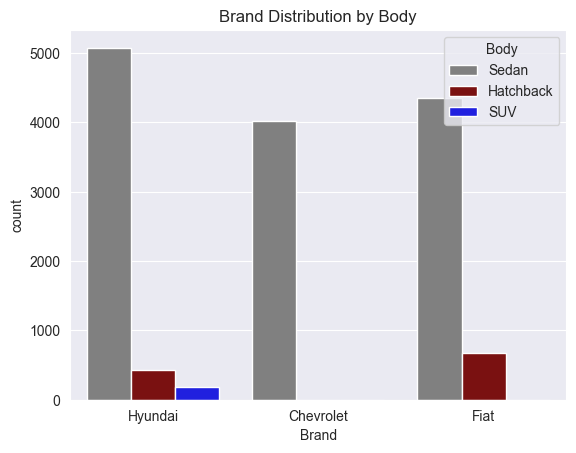

In [62]:
sns.countplot(data = df, x = 'Brand', hue = 'Body')
plt.title('Brand Distribution by Body');

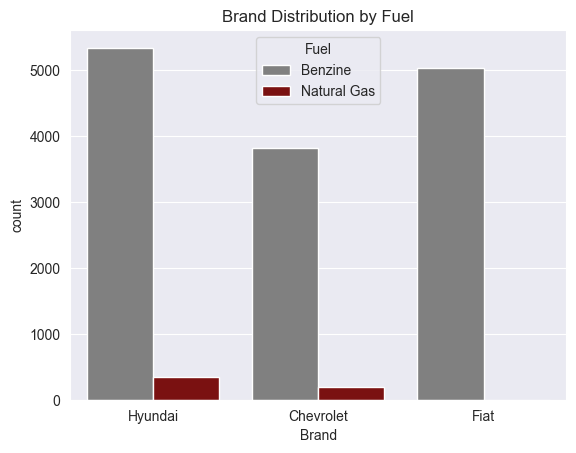

In [64]:

sns.countplot(data = df, x = 'Brand', hue = 'Fuel')
plt.title('Brand Distribution by Fuel');

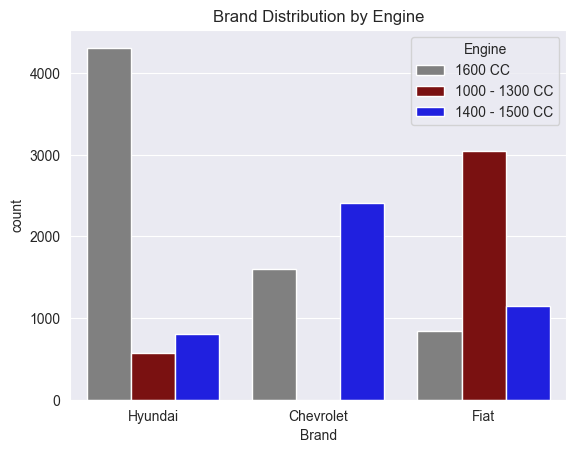

In [65]:
sns.countplot(data = df, x = 'Brand', hue = 'Engine')
plt.title('Brand Distribution by Engine');

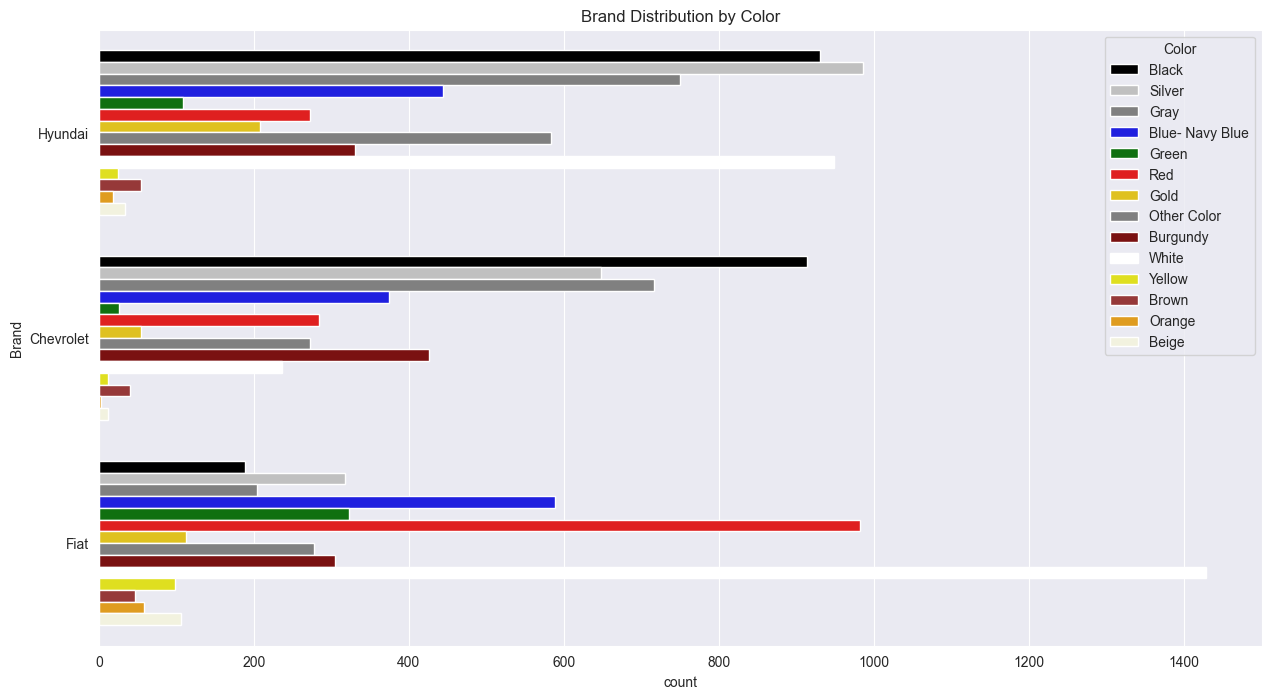

In [67]:
colors = ['black', 'silver', 'gray', 'blue', 'green', 'red', 'gold', 'gray', 'darkred', 'white', 'yellow', 'brown', 'orange', 'beige']
plt.figure(figsize=(15, 8))  
sns.set_palette(colors)
sns.set_style("darkgrid")
sns.countplot(data = df, y = 'Brand', hue = 'Color')

plt.title('Brand Distribution by Color');

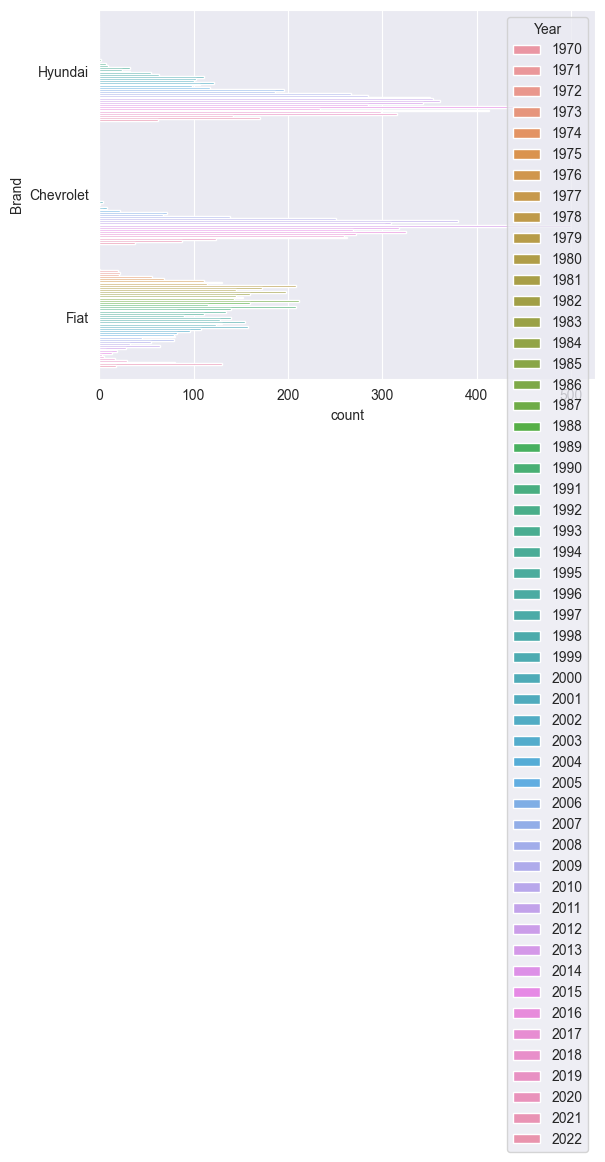

In [69]:
# Needs some handling
sns.countplot(data = df, y = 'Brand', hue = 'Year');

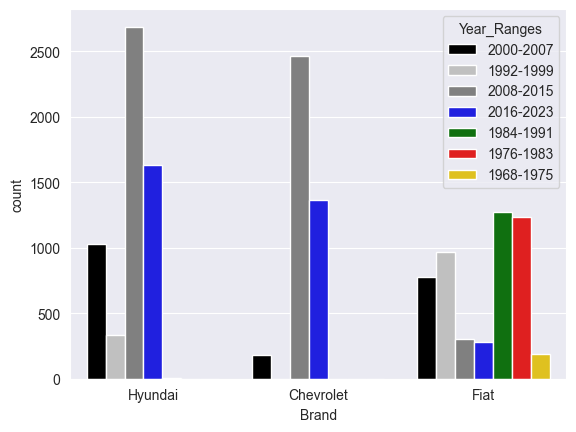

In [16]:
def years_to_ranges(year_series):
    """Map years to categorical ranges of every 8 years.
    Parameters:
        year_series: A pandas Series containing categorical years.
    Returns:
        pandas.Series: A new Series with categorical ranges.
    """
    def year_to_range(year):
        year = int(year)  
        start_range = year // 8 * 8  
        end_range = start_range + 8  
        return f'{start_range}-{end_range - 1}' 
    
    mapped_series = year_series.map(year_to_range)
    
    return mapped_series


df['Year_Ranges'] = years_to_ranges(df['Year'])

sns.countplot(data = df, x = 'Brand', hue = 'Year_Ranges');

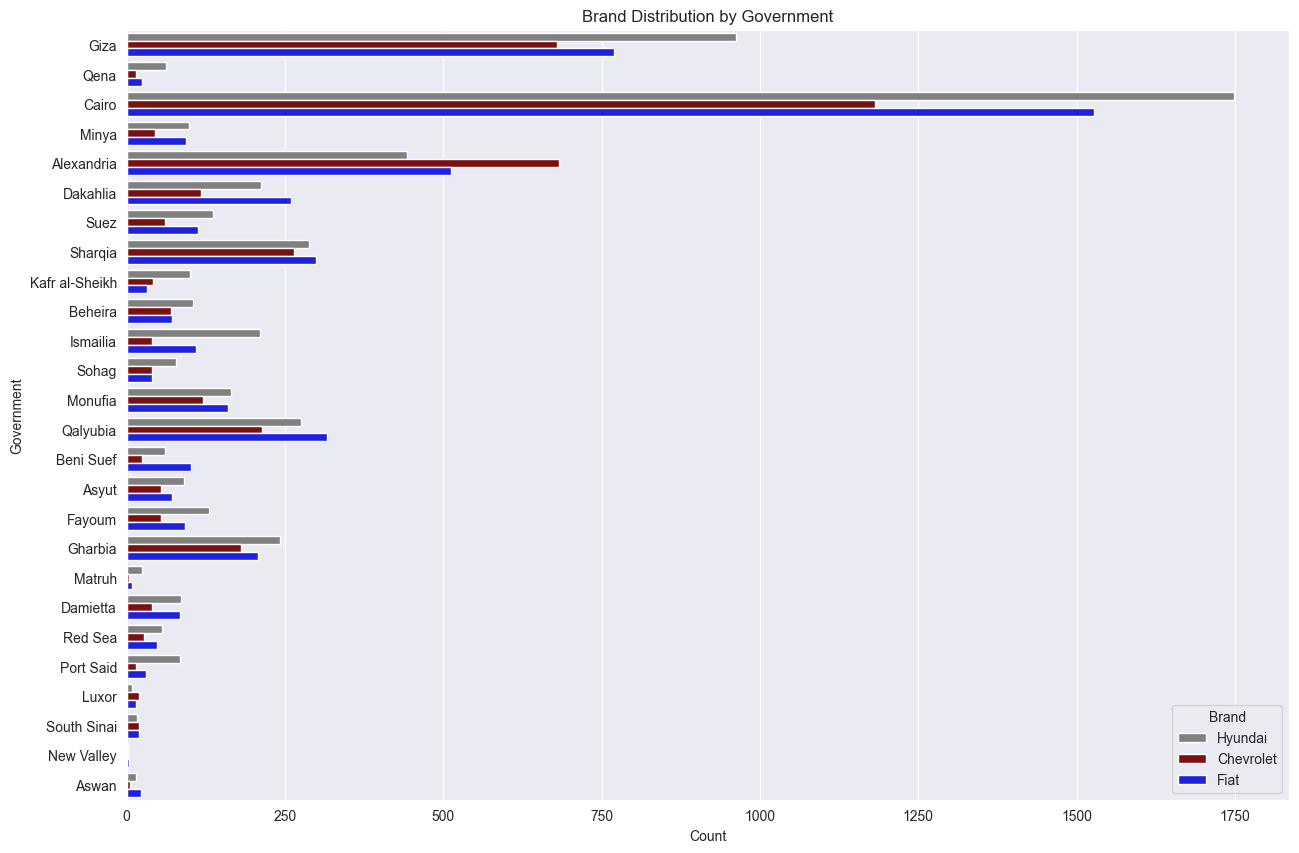

In [70]:
plt.figure(figsize=(15, 10))  
sns.set_palette(['gray', 'darkred', 'blue'])
sns.set_style("darkgrid")

sns.countplot(data=df, y='Gov', hue='Brand')
plt.xlabel('Count')
plt.ylabel('Government')
plt.title('Brand Distribution by Government')

plt.show()

<h3 align='center'>2.Data Preprocessing & Model Selection</h3> <a class="anchor" id="DP"></a>


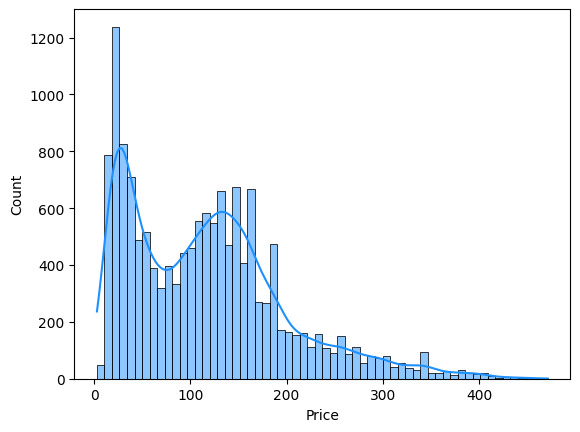

In [5]:
sns.histplot(data=df, x='Price',color = 'dodgerblue', kde=True, bins=60);

In [6]:

old_skew = df.skew().sort_values(ascending=False)
old_skew


Price    0.923168
Year    -0.913110
dtype: float64

### Box-Cox




##### Bx-Cox transformation is a statistical technique that transforms your target variable so that your data closely resembles a normal distribution.
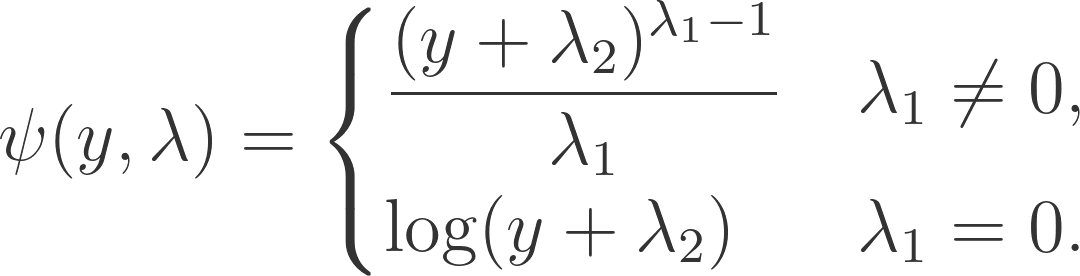

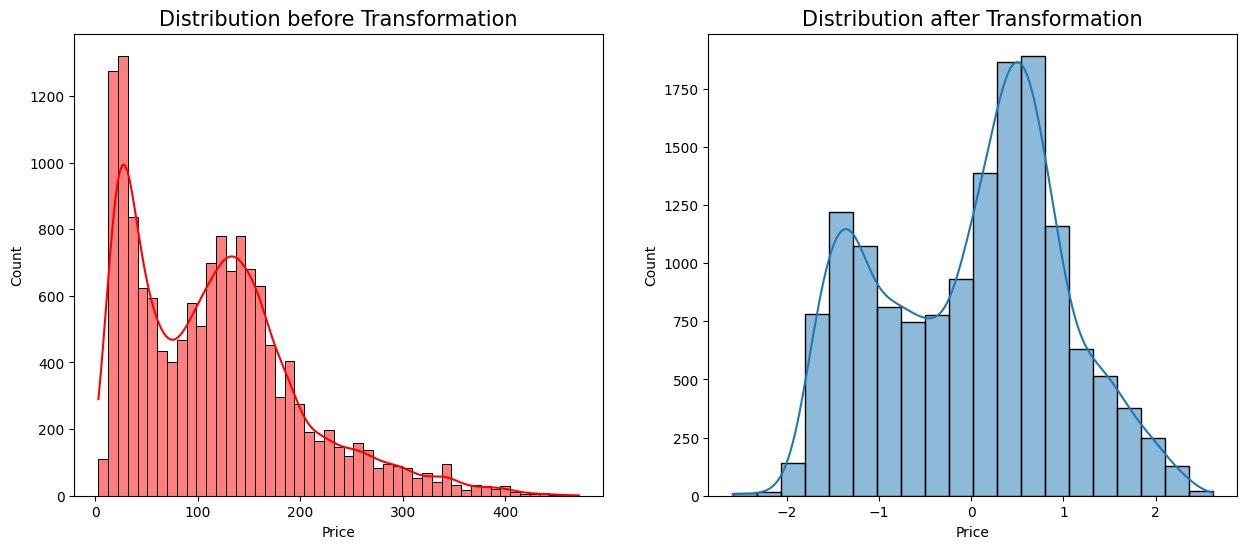

Skewness was 0.92 before 
& is -0.09 after Box-cox transformation.


In [8]:
from sklearn.preprocessing import PowerTransformer


def boxcoxtrans(feature):
    '''
    Apply Box-Cox transformation and check the distribution with histogram and kdeplot.
    parameters:
        feature: target feature to be transformed.
    '''
    
    boxcoxTr = PowerTransformer(method = "box-cox", standardize=True)

    plt.figure(figsize=(15,6))
    plt.subplot(1,2,1)
    plt.title("Distribution before Transformation", fontsize=15)
    sns.histplot(df[feature], kde=True, color="red")
    plt.subplot(1,2,2)
    
    df_boxcox = pd.DataFrame(boxcoxTr.fit_transform(df[feature].values.reshape(-1,1)))
    plt.title("Distribution after Transformation", fontsize=15)
    sns.histplot(df_boxcox,bins=20, kde=True , legend=False)
    plt.xlabel(feature)
    plt.show()
    
    print(f'''Skewness was {round(old_skew[feature],2)} before 
& is {round(df_boxcox.skew()[0],2)} after Box-cox transformation.''')
    
boxcoxtrans(feature="Price")



#### Yeo-Johnson transformation
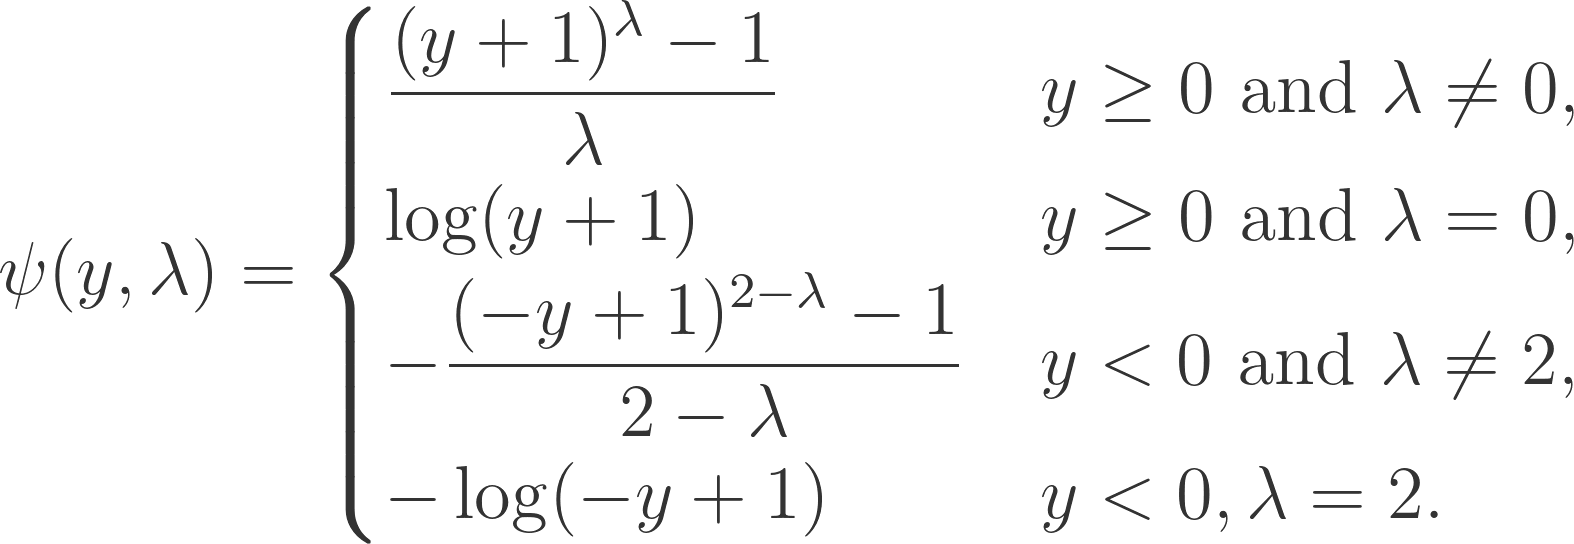

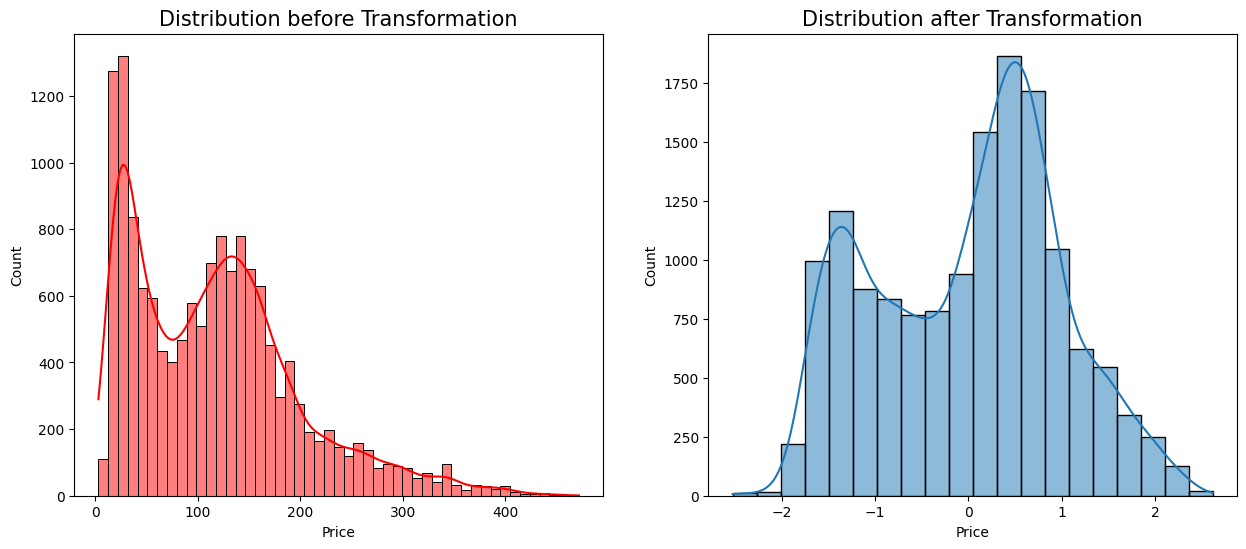

Skewness was 0.92 before & is -0.09 after Yeo-johnson transformation.


In [9]:

def yeojohntrans(feature): 
    '''
    Apply Yeo-Johnson transformation and check the distribution with histogram and kdeplot.
    parameters:
        feature: target feature to be transformed.
    '''
    
    yeojohnTr = PowerTransformer(standardize=True) # Notice: yeo-johnson is the default

    plt.figure(figsize=(15,6))
    plt.subplot(1,2,1)
    plt.title("Distribution before Transformation", fontsize=15)
    sns.histplot(df[feature], kde=True, color="red")
    plt.subplot(1,2,2)
    
    df_yeojohn = pd.DataFrame(yeojohnTr.fit_transform(df[feature].values.reshape(-1,1)))
    plt.title("Distribution after Transformation", fontsize=15)
    sns.histplot(df_yeojohn,bins=20, kde=True , legend=False)
    plt.xlabel(feature)
    plt.show()
    
    print(f'''Skewness was {round(old_skew[feature],2)} before & is {round(df_yeojohn.skew()[0],2)} after Yeo-johnson transformation.''')
    
yeojohntrans(feature="Price")

<h4>Split the data into training and testing sets.</h4> <a class="anchor" id="sec_2_1"></a>

In [22]:
from sklearn.model_selection import train_test_split

target = 'Price'
y = df[target] * 1e3               # rescale the Price
X = df.drop(columns=[target])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)




<h4> Creating our pipeline.</h4> <a class="anchor" id="section_2_2"></a>


In [23]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.ensemble import GradientBoostingRegressor


categorical_columns =  selector(dtype_include=object)(df)

ordinal_encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

gbr_pipeline = Pipeline([
    ('preprocessor',ColumnTransformer(
        transformers=[
            ("categorical", ordinal_encoder, categorical_columns),
        ],
        remainder="passthrough",
        verbose_feature_names_out=False,
    )),
    ('regressor', GradientBoostingRegressor(
        learning_rate=0.5,
    ))
]).set_output(transform='pandas')




In [24]:
gbr_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('categorical',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['Brand', 'Model', 'Body',
                                                   'Color', 'Fuel',
                                                   'Kilometers', 'Engine',
                                                   'Transmission', 'Gov',
                                                   'Year_Ranges'])],
                                   verbose_feature_names_out=False)),
                ('regressor', GradientBoostingRegressor(learning_rate=0.5))])

In [25]:
data = gbr_pipeline.named_steps['preprocessor'].fit_transform(X)
data

,Brand,Model,Body,Color,Fuel,Kilometers,Engine,Transmission,Gov,Year_Ranges,Year
0,2.0,2.0,2.0,1.0,0.0,4.0,2.0,0.0,10.0,4.0,2007
1,2.0,2.0,2.0,11.0,0.0,6.0,0.0,1.0,20.0,4.0,2005
2,2.0,2.0,2.0,6.0,0.0,4.0,1.0,1.0,10.0,3.0,1999
3,2.0,2.0,2.0,2.0,0.0,4.0,2.0,0.0,5.0,5.0,2009
4,2.0,2.0,2.0,11.0,0.0,1.0,0.0,1.0,10.0,4.0,2000
...,...,...,...,...,...,...,...,...,...,...,...
14736,1.0,16.0,0.0,4.0,0.0,5.0,0.0,1.0,5.0,3.0,1997
14737,1.0,16.0,0.0,11.0,0.0,7.0,0.0,1.0,0.0,3.0,1996
14738,1.0,16.0,0.0,4.0,0.0,1.0,0.0,1.0,10.0,3.0,1993
14739,1.0,16.0,0.0,11.0,0.0,1.0,0.0,1.0,5.0,3.0,1996


In [26]:
train_score = gbr_pipeline.score(X_train, y_train)
test_score = gbr_pipeline.score(X_test, y_test)

print(f"Train R^2 Score: {train_score:.3f}")
print(f"Test R^2 Score: {test_score:.3f}")

Train R^2 Score: 0.925
Test R^2 Score: 0.915


<h3 align="center">3.Training and Evaluation</h3> <a class="anchor" id="MS"></a>


In [27]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_validate



# in cases of 'accuracy_score' or 'f1_score', the higher score is better,
# but in case of losses (errors), lower score is better. To handle them both in same way, it returns the negative.

def evaluate(model, X, y, cv):
    cv_results = cross_validate(
        model,
        X,
        y,
        cv=cv,
        scoring=["neg_root_mean_squared_error"],
    )
    rmse = -cv_results["test_neg_root_mean_squared_error"]
    print(
        f"Root Mean Squared Error: {rmse.mean():.3f} +/- {rmse.std():.3f}"
    )
    return cv_results

cv = ShuffleSplit(n_splits=6, test_size=0.3, random_state=0)
# cv_results = evaluate(gbr_pipeline, X_train, y_train, cv=cv)
cv_results = evaluate(gbr_pipeline, X, y, cv=cv)



Root Mean Squared Error: 24753.473 +/- 430.584


<h4>Bias-Variance and Overfit-Underfit investigation.</h4><a class="anchor" id="sec_3_1"></a>

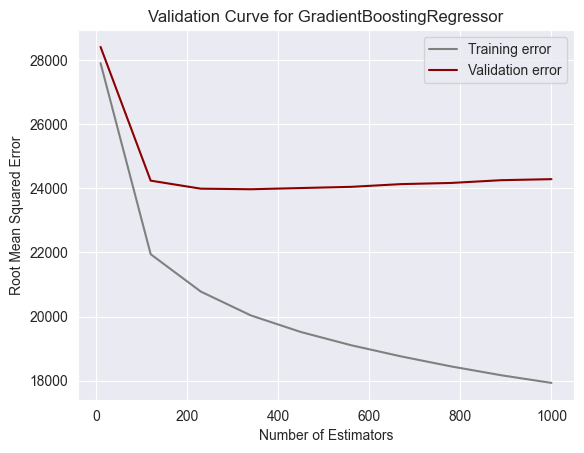

CPU times: total: 2min 15s
Wall time: 2min 49s


In [28]:
%%time
from sklearn.model_selection import validation_curve

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
param_range = np.linspace(10, 1000, 10).astype(int) 

train_scores, test_scores = validation_curve(
    gbr_pipeline, X_train, y_train, param_name="regressor__n_estimators", param_range=param_range,
    scoring="neg_mean_squared_error", cv=cv
)


# Convert the negative MSE scores to positive RMSE scores
train_rmse = np.sqrt(-train_scores)
test_rmse = np.sqrt(-test_scores)

# Calculate mean and training and test RMSE
train_mean = np.mean(train_rmse, axis=1)
test_mean = np.mean(test_rmse, axis=1)

# Plot the validation curve
plt.plot(param_range, train_mean , label="Training error")
plt.plot(param_range, test_mean, label="Validation error")


plt.xlabel("Number of Estimators")
plt.ylabel("Root Mean Squared Error")
plt.title("Validation Curve for GradientBoostingRegressor")
plt.legend(loc="best")
plt.show()


<h4>Effect of the sample size in cross-validation</h4><a class="anchor" id="sec_3_2"></a>

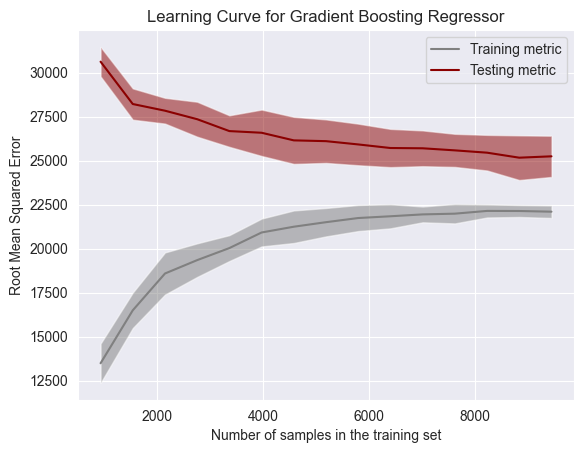

CPU times: total: 1.2 s
Wall time: 12.3 s


In [30]:
%%time
from sklearn.model_selection import LearningCurveDisplay


train_sizes = np.linspace(0.1, 1.0, num=15, endpoint=True) 
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)  

# Create a LearningCurveDisplay
display = LearningCurveDisplay.from_estimator(
    gbr_pipeline,
    X_train,
    y_train,
    train_sizes=train_sizes,
    cv=cv,
    score_type="both",  # both train and test errors
    scoring = "neg_root_mean_squared_error",
    negate_score=True,  # use when metric starts with "neg_"

    score_name="Root Mean Squared Error",
    std_display_style="fill_between",
    n_jobs=-1,
)


_ = display.ax_.set_title("Learning Curve for Gradient Boosting Regressor")
plt.show()

<h4>Other potential models to consider.</h4> <a class="anchor" id="sec_3_2"></a>


In [31]:
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor



X_train_fitted = gbr_pipeline.named_steps['preprocessor'].fit_transform(X_train)
X_test_fitted = gbr_pipeline.named_steps['preprocessor'].fit_transform(X_test)



models = {
    "KNNR": KNeighborsRegressor(),
    "DTR": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "XGB": XGBRegressor(),
}

for model_name, model in models.items():
    model.fit(X_train_fitted, y_train)
    

In [32]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

for model_name, model in models.items():
    y_test_pred = model.predict(X_test_fitted)
   
    rmse = mean_squared_error(y_test, y_test_pred, squared=False)
    r2 = r2_score(y_test, y_test_pred)
    
    print(f"Model: {model_name}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
    print(f"R^2: {r2:.5f}")
    print("--------")

Model: KNNR
Root Mean Squared Error (RMSE): 29784.27
R^2: 0.86966
--------
Model: DTR
Root Mean Squared Error (RMSE): 27888.63
R^2: 0.88572
--------
Model: Random Forest
Root Mean Squared Error (RMSE): 23034.15
R^2: 0.92204
--------
Model: Gradient Boosting
Root Mean Squared Error (RMSE): 25369.59
R^2: 0.90543
--------
Model: XGB
Root Mean Squared Error (RMSE): 21621.24
R^2: 0.93131
--------


* KNNR ( K Neighbors Regressor ):
    - The model has a relatively high RMSE.
    
* DTR ( Decision Tree Regressor ):
    - The model has a relatively high RMSE, and R-squared value a little bit higher than KNNR.

* Random Forest:
    - The model has a relatively low RMSE compared with KNNR and DTR which indicates better prediction accuracy.
    - It has a noticeable improvement in R-squared value than previous models.
    - Random Forest is performing well on this dataset.

* Gradient Boosting:
    - The model also has a relatively low RMSE.
    - Its R-squared value is close to the Random Forest's R-squared, 
    - Gradient Boosting is performing well.

* XGB ( XGB Regressor ):
    - The model has the least RMSE value compared to other models.
    - Its R-squared value is the highest.

----------------------------------------------------------------
* In summary
    - Among previous models, XGBRegressor & Random Forest appear to have the best performance based on the lowest RMSE and R-squared value.
    - Gradient Boosting is performing slightly below both XGBRegressor & Random Forest but is still a good choice.
    - KNNR & DTR are underperforming. 
   


> Ultimately, the choice of the best model depends on various factors, including the specific goals of your analysis, the interpretability of the model, and potential further optimizations.

<h3 align="center">4.Hyperparameter Tuning</h3> <a class="anchor" id="HT"></a>


<h4>Hyperparameter Tuning using GridSearchCV.</h4> <a class="anchor" id="sec_4_1"></a>

In [41]:
from sklearn.model_selection import GridSearchCV




pipe = Pipeline([
    ('preprocessor',ColumnTransformer(
        transformers=[
            ("categorical", ordinal_encoder, categorical_columns),
        ])),
    ('regressor', GradientBoostingRegressor())
])


param_grid = {
    'regressor__n_estimators': [50, 100, 150],
    'regressor__learning_rate': [1, 0.5, 0.25, 0.1, 0.05, 0.01],
    'regressor__min_samples_split': [2, 5, 10],
}


grid_search = GridSearchCV(estimator=pipe, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('categorical',
                                                                         OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         ['Brand',
                                                                          'Model',
                                                                          'Body',
                                                                          'Color',
                                                                          'Fuel',
                                                                          'Kilometers',
                                                                          'Engine',
                                                                          'Transmission',
                                                                          'Gov',
                                                                          'Year_Ranges'])])),
                                       ('regressor',
                                        GradientBoostingRegressor())]),
             n_jobs=-1,
             param_grid={'regressor__learning_rate': [1, 0.5, 0.25, 0.1, 0.05,
                                                      0.01],
                         'regressor__min_samples_split': [2, 5, 10],
                         'regressor__n_estimators': [50, 100, 150]})

In [59]:
from sklearn.metrics import mean_squared_error, r2_score

# get the best hyperparameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print(f"Best Hyperparameters \n{best_params}")

Best Hyperparameters 
{'regressor__learning_rate': 0.5, 'regressor__min_samples_split': 10, 'regressor__n_estimators': 150}


In [43]:
# Model evaluation (after hyperparameter tuning)
y_test_pred_tuned = best_model.predict(X_test)
r2_tuned = r2_score(y_test, y_test_pred_tuned)
rmse_tuned = mean_squared_error(y_test, y_test_pred_tuned, squared=False)

print("\nGBR after hyperparameter tuning with GridSearchCV ")
print(f"R-squared (R2): {r2_tuned}")
print(f"Root Mean Squared Error (MSE): {rmse_tuned}")


GBR after hyperparameter tuning with GridSearchCV 
R-squared (R2): 0.8974707973701769
Root Mean Squared Error (MSE): 26415.88963541648


<h4>Hyperparameter Tuning using RandomizedSearchCV.</h4> <a class="anchor" id="sec_4_2"></a>



In [44]:
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    'regressor__n_estimators': np.arange(50, 200, 10),
    'regressor__learning_rate': [1, 0.5, 0.25, 0.1, 0.05, 0.01],
    'regressor__min_samples_split': np.arange(2, 11),
}

n_iter_search = 20  
random_search = RandomizedSearchCV(
    estimator=pipe, param_distributions=param_dist, n_iter=n_iter_search, cv=5, n_jobs=-1)

random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('categorical',
                                                                               OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                              unknown_value=-1),
                                                                               ['Brand',
                                                                                'Model',
                                                                                'Body',
                                                                                'Color',
                                                                                'Fuel',
                                                                                'Kilometers',
                                                                                'Engine',
                                                                                'Transmission',
                                                                                'Gov',
                                                                                'Year_Ranges'])])),
                                             ('regressor',
                                              GradientBoostingRegressor())]),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'regressor__learning_rate': [1, 0.5,
                                                                     0.25, 0.1,
                                                                     0.05,
                                                                     0.01],
                                        'regressor__min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10]),
                                        'regressor__n_estimators': array([ 50,  60,  70,  80,  90, 100, 110, 120, 130, 140, 150, 160, 170,
       180, 190])})

In [53]:
# get the best hyperparameters and model
best_params = random_search.best_params_
best_model = random_search.best_estimator_

print(f"Best Hyperparameters \n{best_params}")

Best Hyperparameters 
{'regressor__n_estimators': 180, 'regressor__min_samples_split': 9, 'regressor__learning_rate': 0.5}


In [49]:
# Model evaluation (after hyperparameter tuning)
y_test_pred_tuned = best_model.predict(X_test)
r2_tuned = r2_score(y_test, y_test_pred_tuned)
rmse_tuned = mean_squared_error(y_test, y_test_pred_tuned, squared=False)

print("\nGBR after hyperparameter tuning with RandomizedSearchCV")
print(f"R-squared (R2): {r2_tuned}")
print(f"Root Mean Squared Error (MSE): {rmse_tuned}")


GBR after hyperparameter tuning with RandomizedSearchCV
R-squared (R2): 0.8984439831641009
Root Mean Squared Error (MSE): 26290.223669884374


In [50]:
# Saving the model for deployment
import joblib
try:    
    print("Saving pipeline!....")
    pipeline_filename = 'models/gbr_pipeline.pkl'
    joblib.dump(gbr_pipeline, pipeline_filename);
    print("Pipeline saved successfully!")
    
except Exception as err:
    print(f"Unexpected {err=}, {type(err)=}")

Saving pipeline!....
Pipeline saved successfully!


<h3 align="center">5.Model Interpretation</h3>  <a class="anchor" id="MI"></a>



<h5>Interpret the model to understand which features have the most significant impact on the car's price.</h5> <a class="anchor" id="section_6_1"></a>


<h5>for ensemble models like Random Forest, Gradient Boosting, XGBoost,etc. we can use the feature importances provided by the models to determine the most significant features. For linear models like Linear Regression, we can examine the coefficients of the features. </h5>

In [51]:
from sklearn.inspection import permutation_importance

perm_importance = permutation_importance(gbr_pipeline, X_train, y_train, n_repeats=2, random_state=1066).importances_mean
importance_df = pd.DataFrame({'features': X_train.columns,
                              'importance': perm_importance})
importance_df.sort_values(by='importance', ascending=False, inplace=True)
importance_df


,features,importance
4,Year,1.081950
1,Model,0.137521
8,Transmission,0.060854
0,Brand,0.051064
7,Engine,0.031452
3,Color,0.015220
6,Kilometers,0.009999
9,Gov,0.008060
2,Body,0.007000
5,Fuel,0.005061
